In [18]:
import numpy as np
import os

import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

from pymongo import MongoClient

import datetime

import sys
sys.path.append('../..')

import utils.dbUtils

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [19]:
client = MongoClient('192.168.178.25', 27017)
db = client.TFE
collection = db.results

In [20]:
train = utils.dbUtils.TokenizedIterator('liar_liar', filters = {'split' : {'$in' : ['train', 'valid']}})
y_train = np.array([x for x in train.iterTags()])

test = utils.dbUtils.TokenizedIterator('liar_liar', filters = {'split' : 'test'})
y_test = np.array([x for x in test.iterTags()])

In [27]:
vectorizer = TfidfVectorizer(max_features = 1000)
X_train = vectorizer.fit_transform([' '.join(news) for news in train])
X_test = vectorizer.transform([' '.join(news) for news in test])
svc = LinearSVC(C = 0.1)
svc.fit(X_train, y_train)

roc1 = roc_curve(y_test, svc.decision_function(X_test), pos_label='fake')
auc1 = roc_auc_score(y_test, svc.decision_function(X_test))

roc3 = roc_curve(y_test, ridge.decision_function(X_test), pos_label='fake')
auc3 = roc_auc_score(y_test, ridge.decision_function(X_test))

ridge = RidgeClassifier()
ridge.fit(X_train, y_train)

vectorizer = TfidfVectorizer(max_features = None)
X_train = vectorizer.fit_transform([' '.join(news) for news in train])
X_test = vectorizer.transform([' '.join(news) for news in test])
dt = DecisionTreeClassifier(max_depth=1000)
dt.fit(X_train, y_train)


nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [28]:
y_score = dt.predict_proba(X_test)
roc2 = roc_curve(y_test, y_score[:,1], pos_label='fake')
auc2 = roc_auc_score(y_test, y_score[:,1])
y_score = nb.predict_proba(X_test)
roc4 = roc_curve(y_test, y_score[:,1], pos_label='fake')
auc4 = roc_auc_score(y_test, y_score[:,1])

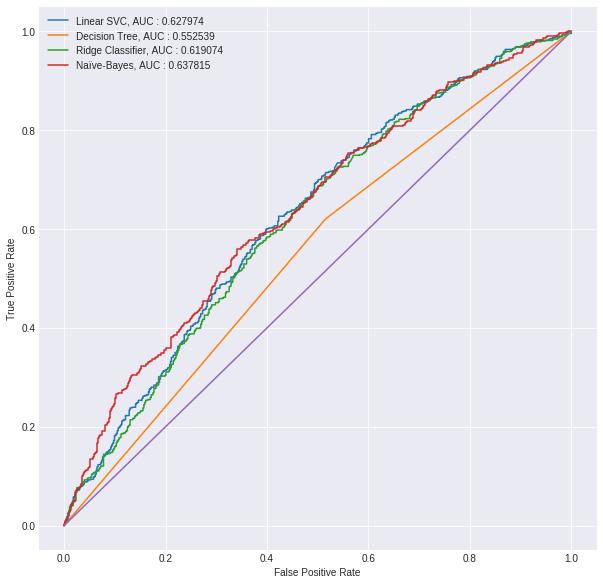

In [32]:
plt.figure(figsize = (10,10))
plt.plot(roc1[1], roc1[0], label = 'Linear SVC, AUC : {:4f}'.format(auc1))
plt.plot(roc2[1], roc2[0], label = 'Decision Tree, AUC : {:4f}'.format(auc2))
plt.plot(roc3[1], roc3[0], label = 'Ridge Classifier, AUC : {:4f}'.format(auc3))
plt.plot(roc4[1], roc4[0], label = 'Naïve-Bayes, AUC : {:4f}'.format(auc4))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.plot([0, 1], [0, 1])
plt.savefig('output/roc1.pdf')